In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

df= SparkSession.builder.appName("NSEProject").getOrCreate()

currentdf = df.read.option("header","true").option("inferSchema","true").csv("fo03MAY2023bhav.csv")

prevdf = df.read.option("header","true").option("inferSchema","true").csv("fo02MAY2023bhav.csv")


In [3]:
print(currentdf.count())

46622


In [4]:
print(prevdf.count())

45840


In [5]:
currentdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- STRIKE_PR: double (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: double (nullable = true)
 |-- HIGH: double (nullable = true)
 |-- LOW: double (nullable = true)
 |-- CLOSE: double (nullable = true)
 |-- SETTLE_PR: double (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: double (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)



In [6]:
prevdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- STRIKE_PR: double (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: double (nullable = true)
 |-- HIGH: double (nullable = true)
 |-- LOW: double (nullable = true)
 |-- CLOSE: double (nullable = true)
 |-- SETTLE_PR: double (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: double (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)



**Including only "Instruments" having only either "FUTIDX" or "FUTSTX" valueS in the output**

In [7]:
from pyspark.sql.functions import col
newcurrdff= currentdf.filter(col("INSTRUMENT").isin(["FUTIDX","FUTSTK"]))
newprevdff = prevdf.filter(col("INSTRUMENT").isin(["FUTIDX","FUTSTK"]))

In [8]:
print(newcurrdff.count())

577


In [9]:
print(newprevdff.count())

577


**Now Filtering the index on the nearest Expiry Date 25-05-2023 after coverting date column into dd-mm-yyy format**

In [10]:
from pyspark.sql.functions import to_date,regexp_replace
import datetime
import calendar


#first converting the date column into "dd-MM-yyyy" format which currently is in formate 02-May-2023
curr_month_two_digit = str(datetime.date.today().strftime('%m'))
curr_month           = datetime.datetime.now().month
get_short_month_name = str(calendar.month_abbr[curr_month])

# print("get_short_month_name: "+get_short_month_name)
# print("curr_month: "+curr_month_two_digit)

#changing the DF
currdf = newcurrdff.withColumn("EXPIRY_DT_NUM", regexp_replace(col("EXPIRY_DT"), str(get_short_month_name) , str(curr_month_two_digit)))
prevdf = newprevdff.withColumn("EXPIRY_DT_NUM", regexp_replace(col("EXPIRY_DT"), str(get_short_month_name) , str(curr_month_two_digit)))


In [11]:
currdropdf= currdf.drop(col("EXPIRY_DT"))
currdropdf.take(3)

[Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43152.0, HIGH=43348.0, LOW=43116.95, CLOSE=43311.6, SETTLE_PR=43311.6, CONTRACTS=84232, VAL_INLAKH=910482.61, OPEN_INT=2312900, CHG_IN_OI=6800, TIMESTAMP='03-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43361.45, HIGH=43490.0, LOW=43262.0, CLOSE=43456.05, SETTLE_PR=43456.05, CONTRACTS=4061, VAL_INLAKH=44034.71, OPEN_INT=224325, CHG_IN_OI=12675, TIMESTAMP='03-MAY-2023', _c15=None, EXPIRY_DT_NUM='29-Jun-2023'),
 Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43449.95, HIGH=43617.3, LOW=43417.05, CLOSE=43582.95, SETTLE_PR=43582.95, CONTRACTS=878, VAL_INLAKH=5730.59, OPEN_INT=15960, CHG_IN_OI=2400, TIMESTAMP='03-MAY-2023', _c15=None, EXPIRY_DT_NUM='27-Jul-2023')]

In [12]:
prevdropdf= prevdf.drop(col("EXPIRY_DT"))
prevdropdf.take(3)

[Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43360.0, HIGH=43479.0, LOW=43255.65, CLOSE=43367.25, SETTLE_PR=43367.25, CONTRACTS=79128, VAL_INLAKH=858521.16, OPEN_INT=2306100, CHG_IN_OI=15400, TIMESTAMP='02-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43392.35, HIGH=43606.85, LOW=43392.35, CLOSE=43500.8, SETTLE_PR=43500.8, CONTRACTS=4752, VAL_INLAKH=51718.85, OPEN_INT=211650, CHG_IN_OI=21000, TIMESTAMP='02-MAY-2023', _c15=None, EXPIRY_DT_NUM='29-Jun-2023'),
 Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43627.0, HIGH=43735.0, LOW=43576.15, CLOSE=43660.55, SETTLE_PR=43660.55, CONTRACTS=1436, VAL_INLAKH=9410.41, OPEN_INT=13560, CHG_IN_OI=7155, TIMESTAMP='02-MAY-2023', _c15=None, EXPIRY_DT_NUM='27-Jul-2023')]

In [13]:
current_df=currdropdf.filter(col("EXPIRY_DT_NUM").isin("25-05-2023"))
prev_df=prevdropdf.filter(col("EXPIRY_DT_NUM").isin("25-05-2023"))

In [14]:
current_df.take(5)

[Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43152.0, HIGH=43348.0, LOW=43116.95, CLOSE=43311.6, SETTLE_PR=43311.6, CONTRACTS=84232, VAL_INLAKH=910482.61, OPEN_INT=2312900, CHG_IN_OI=6800, TIMESTAMP='03-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTIDX', SYMBOL='NIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=18154.9, HIGH=18180.0, LOW=18100.3, CLOSE=18149.95, SETTLE_PR=18149.95, CONTRACTS=135798, VAL_INLAKH=1231729.89, OPEN_INT=9573200, CHG_IN_OI=-13900, TIMESTAMP='03-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTSTK', SYMBOL='AARTIIND', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=558.7, HIGH=560.4, LOW=552.15, CLOSE=553.75, SETTLE_PR=553.75, CONTRACTS=863, VAL_INLAKH=4080.17, OPEN_INT=3473950, CHG_IN_OI=45050, TIMESTAMP='03-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTSTK', SYMBOL='ABB', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=3449.45, HIGH=3505.0, LOW=3423.15, CLOSE=3477.1, SETTLE_PR

In [15]:
prev_df.take(5)

[Row(INSTRUMENT='FUTIDX', SYMBOL='BANKNIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=43360.0, HIGH=43479.0, LOW=43255.65, CLOSE=43367.25, SETTLE_PR=43367.25, CONTRACTS=79128, VAL_INLAKH=858521.16, OPEN_INT=2306100, CHG_IN_OI=15400, TIMESTAMP='02-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTIDX', SYMBOL='NIFTY', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=18180.45, HIGH=18247.25, LOW=18180.45, CLOSE=18213.15, SETTLE_PR=18213.15, CONTRACTS=114511, VAL_INLAKH=1043095.75, OPEN_INT=9587100, CHG_IN_OI=832600, TIMESTAMP='02-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTSTK', SYMBOL='AARTIIND', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=564.05, HIGH=568.4, LOW=558.6, CLOSE=559.65, SETTLE_PR=559.65, CONTRACTS=1254, VAL_INLAKH=5996.38, OPEN_INT=3428900, CHG_IN_OI=162350, TIMESTAMP='02-MAY-2023', _c15=None, EXPIRY_DT_NUM='25-05-2023'),
 Row(INSTRUMENT='FUTSTK', SYMBOL='ABB', STRIKE_PR=0.0, OPTION_TYP='XX', OPEN=3438.7, HIGH=3483.0, LOW=3412.0, CLOSE=3458.05, SE

In [16]:
prev_df.count()

190

In [17]:
current_df.count()

190

**Saving progress till now in a seperate csv file**

In [18]:
from pyspark import SparkConf

conf = SparkConf().setAppName("NSEProject").setMaster("local[*]").set("spark.hadoop.fs.file.impl", "org.apache.hadoop.fs.RawLocalFileSystem")

spark = SparkSession.builder.config(conf=conf).getOrCreate()

current_df.write.format("csv").save("fo03May23.csv")

In [19]:
current_df.write.csv("fando03May23.csv", header=True)
prev_df.write.csv("fando02May23.csv", header=True)

**Completed Initial filtering of Data, READY for transformation**

In [20]:
currentdf = spark.read.option("header","true").option("inferSchema","true").csv("fando03May23.csv")

prevdf = spark.read.option("header","true").option("inferSchema","true").csv("fando02May23.csv")

In [21]:
# prev_close= prevdf.select(col("CLOSE").alias("NEW_COL"))
# print(prev_close.NEW_COL)
# current_new_df= currentdf.withColumn("PREV_CLOSE",prev_close.NEW_COL)

**renaming the prev data csv columns and joining the data with curr csv to transform**

In [22]:
prevdf_renamed = prevdf.select([col(c).alias(c + '_prev') for c in prevdf.columns])

In [23]:
prevdf_renamed.printSchema()

root
 |-- INSTRUMENT_prev: string (nullable = true)
 |-- SYMBOL_prev: string (nullable = true)
 |-- STRIKE_PR_prev: double (nullable = true)
 |-- OPTION_TYP_prev: string (nullable = true)
 |-- OPEN_prev: double (nullable = true)
 |-- HIGH_prev: double (nullable = true)
 |-- LOW_prev: double (nullable = true)
 |-- CLOSE_prev: double (nullable = true)
 |-- SETTLE_PR_prev: double (nullable = true)
 |-- CONTRACTS_prev: integer (nullable = true)
 |-- VAL_INLAKH_prev: double (nullable = true)
 |-- OPEN_INT_prev: integer (nullable = true)
 |-- CHG_IN_OI_prev: integer (nullable = true)
 |-- TIMESTAMP_prev: string (nullable = true)
 |-- _c15_prev: string (nullable = true)
 |-- EXPIRY_DT_NUM_prev: string (nullable = true)



In [24]:
currentdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- STRIKE_PR: double (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: double (nullable = true)
 |-- HIGH: double (nullable = true)
 |-- LOW: double (nullable = true)
 |-- CLOSE: double (nullable = true)
 |-- SETTLE_PR: double (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: double (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- EXPIRY_DT_NUM: string (nullable = true)



**Adding "close_prev row from prev date csv file" to "current date csv file" to compare prices**

In [25]:
# currentdf["CLOSE_PREV"]= prevdf_renamed['CLOSE_prev'].astype('double')

#if we dont use pandas library we get column not iterable error
import pandas as pd
# PREVCOL=pd.DataFrame(prevdf_renamed['CLOSE_prev'])
PREVCOL=prevdf_renamed.select("CLOSE_prev").toPandas()

#converting df to pandas
current_panda_df =currentdf.toPandas()

# currentdf = currentdf.withColumn("PREV", PREVCOL)
currentdf = current_panda_df.join(PREVCOL)

In [26]:
print(currentdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTRUMENT     190 non-null    object 
 1   SYMBOL         190 non-null    object 
 2   STRIKE_PR      190 non-null    float64
 3   OPTION_TYP     190 non-null    object 
 4   OPEN           190 non-null    float64
 5   HIGH           190 non-null    float64
 6   LOW            190 non-null    float64
 7   CLOSE          190 non-null    float64
 8   SETTLE_PR      190 non-null    float64
 9   CONTRACTS      190 non-null    int32  
 10  VAL_INLAKH     190 non-null    float64
 11  OPEN_INT       190 non-null    int32  
 12  CHG_IN_OI      190 non-null    int32  
 13  TIMESTAMP      190 non-null    object 
 14  _c15           0 non-null      object 
 15  EXPIRY_DT_NUM  190 non-null    object 
 16  CLOSE_prev     190 non-null    float64
dtypes: float64(8), int32(3), object(6)
memory usage: 23.1+

In [27]:
# mergeddf= spark.createDataFrame(currentdf)
# mergeddf.take(4)
# gives error that some schema cannot be infered
#LEARNING

In [28]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

# Define the schema for your DataFrame
schema = StructType([
    StructField("INSTRUMENT", StringType(), True),
    StructField("SYMBOL", StringType(), True),
    StructField("STRIKE_PR", FloatType(), True),
    StructField("OPTION_TYP", StringType(), True),
    StructField("OPEN", FloatType(), True),
    StructField("HIGH", FloatType(), True),
    StructField("LOW", FloatType(), True),
    StructField("CLOSE", FloatType(), True),
    StructField("SETTLE_PR", FloatType(), True),
    StructField("CONTRACTS", IntegerType(), True),
    StructField("VAL_INLAKH", FloatType(), True),
    StructField("OPEN_INT", IntegerType(), True),
    StructField("CHG_IN_OI", IntegerType(), True),
    StructField("TIMESTAMP", StringType(), True),
    StructField("_c15", StringType(), True),
    StructField("EXPIRY_DT", StringType(), True),
    StructField("CLOSE_prev", FloatType(), True)
])

# Create the Spark DataFrame using the specified schema
mergeddf = spark.createDataFrame(currentdf, schema=schema)

# Show the first 4 rows of the DataFrame
mergeddf.show(4)


+----------+---------+---------+----------+-------+-------+--------+--------+---------+---------+----------+--------+---------+-----------+----+----------+----------+
|INSTRUMENT|   SYMBOL|STRIKE_PR|OPTION_TYP|   OPEN|   HIGH|     LOW|   CLOSE|SETTLE_PR|CONTRACTS|VAL_INLAKH|OPEN_INT|CHG_IN_OI|  TIMESTAMP|_c15| EXPIRY_DT|CLOSE_prev|
+----------+---------+---------+----------+-------+-------+--------+--------+---------+---------+----------+--------+---------+-----------+----+----------+----------+
|    FUTIDX|BANKNIFTY|      0.0|        XX|43152.0|43348.0|43116.95| 43311.6|  43311.6|    84232|  910482.6| 2312900|     6800|03-MAY-2023|null|25-05-2023|  43367.25|
|    FUTIDX|    NIFTY|      0.0|        XX|18154.9|18180.0| 18100.3|18149.95| 18149.95|   135798| 1231729.9| 9573200|   -13900|03-MAY-2023|null|25-05-2023|  18213.15|
|    FUTSTK| AARTIIND|      0.0|        XX|  558.7|  560.4|  552.15|  553.75|   553.75|      863|   4080.17| 3473950|    45050|03-MAY-2023|null|25-05-2023|    559.65

In [29]:
mergeddf.count()

190

**Adding "open interest row from prev date csv file" to "current date csv file" to compare prices**

In [30]:
PREVCOL=prevdf_renamed.select("OPEN_INT_prev").toPandas()

#converting df to pandas
merged_panda_df =mergeddf.toPandas()

# currentdf = currentdf.withColumn("PREV", PREVCOL)
currentdf = merged_panda_df.join(PREVCOL)

In [31]:
print(currentdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTRUMENT     190 non-null    object 
 1   SYMBOL         190 non-null    object 
 2   STRIKE_PR      190 non-null    float32
 3   OPTION_TYP     190 non-null    object 
 4   OPEN           190 non-null    float32
 5   HIGH           190 non-null    float32
 6   LOW            190 non-null    float32
 7   CLOSE          190 non-null    float32
 8   SETTLE_PR      190 non-null    float32
 9   CONTRACTS      190 non-null    int32  
 10  VAL_INLAKH     190 non-null    float32
 11  OPEN_INT       190 non-null    int32  
 12  CHG_IN_OI      190 non-null    int32  
 13  TIMESTAMP      190 non-null    object 
 14  _c15           0 non-null      object 
 15  EXPIRY_DT      190 non-null    object 
 16  CLOSE_prev     190 non-null    float32
 17  OPEN_INT_prev  190 non-null    int32  
dtypes: float32

In [32]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

# Define the schema for your DataFrame
schema = StructType([
    StructField("INSTRUMENT", StringType(), True),
    StructField("SYMBOL", StringType(), True),
    StructField("STRIKE_PR", FloatType(), True),
    StructField("OPTION_TYP", StringType(), True),
    StructField("OPEN", FloatType(), True),
    StructField("HIGH", FloatType(), True),
    StructField("LOW", FloatType(), True),
    StructField("CLOSE", FloatType(), True),
    StructField("SETTLE_PR", FloatType(), True),
    StructField("CONTRACTS", IntegerType(), True),
    StructField("VAL_INLAKH", FloatType(), True),
    StructField("OPEN_INT", IntegerType(), True),
    StructField("CHG_IN_OI", IntegerType(), True),
    StructField("TIMESTAMP", StringType(), True),
    StructField("_c15", StringType(), True),
    StructField("EXPIRY_DT", StringType(), True),
    StructField("CLOSE_prev", FloatType(), True),
    StructField("OPEN_INT_prev", IntegerType(), True)
])

# Create the Spark DataFrame using the specified schema
mergeddf = spark.createDataFrame(currentdf, schema=schema)

# Show the first 4 rows of the DataFrame
mergeddf.show(4)

+----------+---------+---------+----------+-------+-------+--------+--------+---------+---------+----------+--------+---------+-----------+----+----------+----------+-------------+
|INSTRUMENT|   SYMBOL|STRIKE_PR|OPTION_TYP|   OPEN|   HIGH|     LOW|   CLOSE|SETTLE_PR|CONTRACTS|VAL_INLAKH|OPEN_INT|CHG_IN_OI|  TIMESTAMP|_c15| EXPIRY_DT|CLOSE_prev|OPEN_INT_prev|
+----------+---------+---------+----------+-------+-------+--------+--------+---------+---------+----------+--------+---------+-----------+----+----------+----------+-------------+
|    FUTIDX|BANKNIFTY|      0.0|        XX|43152.0|43348.0|43116.95| 43311.6|  43311.6|    84232|  910482.6| 2312900|     6800|03-MAY-2023|null|25-05-2023|  43367.25|      2306100|
|    FUTIDX|    NIFTY|      0.0|        XX|18154.9|18180.0| 18100.3|18149.95| 18149.95|   135798| 1231729.9| 9573200|   -13900|03-MAY-2023|null|25-05-2023|  18213.15|      9587100|
|    FUTSTK| AARTIIND|      0.0|        XX|  558.7|  560.4|  552.15|  553.75|   553.75|      86

In [33]:
mergeddf.count()

190

**Saving the Progress till here**

In [34]:
mergeddf.write.csv("FnO03May23.csv", header=True)

**The file got saved in 4 partitions why i dont know ?**

In [35]:
mergeddf.repartition(1).write.format("csv").save("FandO03May23merged.csv")


In [36]:
mergeddf.write.mode('overwrite').option("header", "true").csv('FandO03May23merged.csv')


In [37]:
mergeddf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- STRIKE_PR: float (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: float (nullable = true)
 |-- HIGH: float (nullable = true)
 |-- LOW: float (nullable = true)
 |-- CLOSE: float (nullable = true)
 |-- SETTLE_PR: float (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: float (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- CLOSE_prev: float (nullable = true)
 |-- OPEN_INT_prev: integer (nullable = true)



**Creating the change in Open Interset and  change in closing price**

In [39]:
new_merged = mergeddf.withColumn('CHANGE_IN_LTP', ((col('CLOSE')-col('CLOSE_prev'))/col('CLOSE_prev'))*100 )

In [40]:
new_merged.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- STRIKE_PR: float (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: float (nullable = true)
 |-- HIGH: float (nullable = true)
 |-- LOW: float (nullable = true)
 |-- CLOSE: float (nullable = true)
 |-- SETTLE_PR: float (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: float (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- CLOSE_prev: float (nullable = true)
 |-- OPEN_INT_prev: integer (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)



In [41]:
all_merged = new_merged.withColumn('CHANGE_IN_OI', ((col('OPEN_INT')-col('OPEN_INT_prev'))/col('OPEN_INT_prev'))*100 )

In [42]:
all_merged.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- STRIKE_PR: float (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: float (nullable = true)
 |-- HIGH: float (nullable = true)
 |-- LOW: float (nullable = true)
 |-- CLOSE: float (nullable = true)
 |-- SETTLE_PR: float (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: float (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- CLOSE_prev: float (nullable = true)
 |-- OPEN_INT_prev: integer (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)
 |-- CHANGE_IN_OI: double (nullable = true)



In [43]:
all_merged.count()

190

In [47]:
# all_merged.repartition(1).write.format("csv").save("Final_Result.csv")
#returns single file but with no headers

In [48]:
# all_merged.write.mode('overwrite').option("header", "true").csv('Final_Result.csv')
# this two statements do not work , they return 4 partitions with header 

In [49]:
all_merged.coalesce(1).write.format("csv").option("header", "true").save("Final_Result.csv")

In [50]:
all_merged.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- STRIKE_PR: float (nullable = true)
 |-- OPTION_TYP: string (nullable = true)
 |-- OPEN: float (nullable = true)
 |-- HIGH: float (nullable = true)
 |-- LOW: float (nullable = true)
 |-- CLOSE: float (nullable = true)
 |-- SETTLE_PR: float (nullable = true)
 |-- CONTRACTS: integer (nullable = true)
 |-- VAL_INLAKH: float (nullable = true)
 |-- OPEN_INT: integer (nullable = true)
 |-- CHG_IN_OI: integer (nullable = true)
 |-- TIMESTAMP: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- EXPIRY_DT: string (nullable = true)
 |-- CLOSE_prev: float (nullable = true)
 |-- OPEN_INT_prev: integer (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)
 |-- CHANGE_IN_OI: double (nullable = true)



In [51]:
all_merged.count()

190

In [53]:
# import matplotlib.pyplot as plt
# from pyspark.sql.functions import histogram

# # Assuming your DataFrame is named all_merged
# hist_data = all_merged.select("CHANGE_IN_LTP").rdd.flatMap(lambda x: x).histogram(20)
# x_axis = hist_data[0]
# y_axis = hist_data[1]
# plt.bar(x_axis[:-1], y_axis, width=x_axis[1]-x_axis[0])
# plt.show()
#histogram is not available in python 3 later version

**Visualizing the distribution of CHANGE_IN_LTP values**
** Higher the distribution towards change in extreme ends higher the chance of considering the stock**

In [54]:
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col

# create a bucketizer to bin the values of CHANGE_IN_LTP column
bucketizer = Bucketizer(splits=[float("-inf"), -10, -5, 0, 5, 10, float("inf")], inputCol="CHANGE_IN_LTP", outputCol="bin")

# apply the bucketizer to the DataFrame
binned_data = bucketizer.transform(all_merged)

# use the groupBy and count functions to count the number of rows in each bin
histogram_data = binned_data.groupBy("bin").count().orderBy("bin")

# display the histogram
histogram_data.show()


+---+-----+
|bin|count|
+---+-----+
|0.0|    1|
|2.0|   91|
|3.0|   96|
|4.0|    2|
+---+-----+



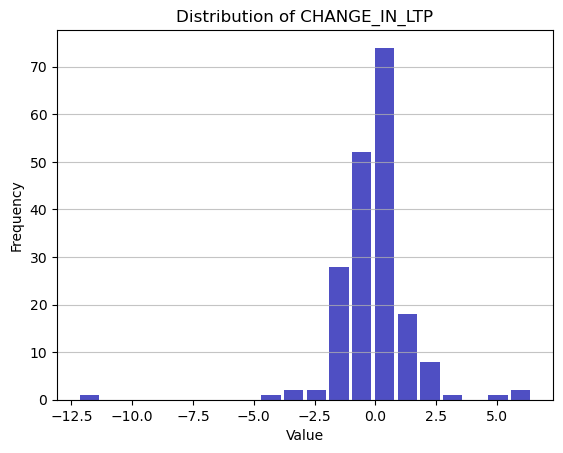

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to a Pandas DataFrame for plotting
pdf = all_merged.select('CHANGE_IN_LTP').toPandas()

# Plot the histogram
n, bins, patches = plt.hist(x=pdf, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of CHANGE_IN_LTP')

plt.show()


**Filter for LONG BUILD UP**  10% or above OI and 2% or above close change

In [60]:
long_buildup=all_merged.filter((col('CHANGE_IN_OI') > 8.5) & (col('CHANGE_IN_LTP') > 2) ).select(col('INSTRUMENT'),col('SYMBOL'),col('CHANGE_IN_OI'),col('CHANGE_IN_LTP'))

In [71]:
from pyspark.sql.functions import lit

longbuildupdf=long_buildup.withColumn("CALL",lit("Buy CE or Sell PE if uptrend confirms")).drop("LONG_BUILDUP")

In [78]:
longbuildupdf=longbuildupdf.withColumn("CALL_TYPE",lit("LONG_BUILDUP"))

In [82]:
longbuildupdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- CHANGE_IN_OI: double (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)
 |-- CALL: string (nullable = false)
 |-- CALL_TYPE: string (nullable = false)



**Filter for SHORT BUILD UP**  10% or above OI and -2% or above close change

In [64]:
short_buildup=all_merged.filter((col('CHANGE_IN_OI') > 8.5) & (col('CHANGE_IN_LTP') > -1.8) ).select(col('INSTRUMENT'),col('SYMBOL'),col('CHANGE_IN_OI'),col('CHANGE_IN_LTP'))

In [72]:
from pyspark.sql.functions import lit

shortbuildupdf=short_buildup.withColumn("CALL",lit("Buy PE or Sell CE if downtrend confirms")).drop("SHORT_BUILDUP")

In [79]:
shortbuildupdf=shortbuildupdf.withColumn("CALL_TYPE",lit("SHORT_BUILDUP"))

In [83]:
shortbuildupdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- CHANGE_IN_OI: double (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)
 |-- CALL: string (nullable = false)
 |-- CALL_TYPE: string (nullable = false)



**Filter for LONG UNWINDING**  -10% or above OI and -2% or above close change

In [66]:
long_unwinding=all_merged.filter((col('CHANGE_IN_OI') > -8.5) & (col('CHANGE_IN_LTP') > -2) ).select(col('INSTRUMENT'),col('SYMBOL'),col('CHANGE_IN_OI'),col('CHANGE_IN_LTP'))

In [73]:
longunwindingdf=long_unwinding.withColumn("CALL",lit("Buy PE or Sell CE if downtrend confirms")).drop("LONG_UNWINDING")

In [80]:
longunwindingdf=longunwindingdf.withColumn("CALL_TYPE",lit("LONG_UNWINDING"))

In [84]:
longunwindingdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- CHANGE_IN_OI: double (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)
 |-- CALL: string (nullable = false)
 |-- CALL_TYPE: string (nullable = false)



**Filter for SHORT UNWINDING**  -10% or above OI and 2% or above close change

In [69]:
short_unwinding=all_merged.filter((col('CHANGE_IN_OI') > -8.5) & (col('CHANGE_IN_LTP') > 2) ).select(col('INSTRUMENT'),col('SYMBOL'),col('CHANGE_IN_OI'),col('CHANGE_IN_LTP'))

In [74]:
shortunwindingdf=short_unwinding.withColumn("CALL",lit("Buy CE or Sell PE if uptrend confirms")).drop("SHORT UNWINDING")

In [81]:
shortunwindingdf=shortunwindingdf.withColumn("CALL_TYPE",lit("SHORT_UNWINDING"))

In [85]:
shortunwindingdf.printSchema()

root
 |-- INSTRUMENT: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- CHANGE_IN_OI: double (nullable = true)
 |-- CHANGE_IN_LTP: double (nullable = true)
 |-- CALL: string (nullable = false)
 |-- CALL_TYPE: string (nullable = false)



In [86]:
calls_today=longbuildupdf.union(shortbuildupdf).union(longunwindingdf).union(shortunwindingdf)

In [89]:
calls_today.take(3)

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it